In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # graphics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
filelist = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        filelist.append(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Processing

In [2]:
from PIL import Image
labels = []
images = []

In [3]:
#Importing Images from File-List
for image_path in filelist:
    image = Image.open(image_path)
    image = image.convert('RGB') #Removing Transparency Channel from PNG(To match dimensions with some JPG images)
    image = np.array(image)
    image = image/255 #Normalization
    
    image_label = image_path.split("/")[-1].split(".")[0]
    
    images.append(image)
    labels.append(image_label)

In [4]:
#Stacking Images to a Numpy Array
images = np.stack(images)
print(images.shape)

(2140, 50, 200, 3)


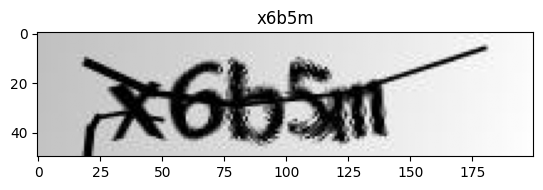

[[[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 [[0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]]

 ...

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.76470588 0.76470588 0.76470588]
  [0.76470588 0.76470588 0.76470588]


In [5]:
plt.imshow(images[19])
plt.title(labels[19])
plt.axis('on')  # Turn off axis labels
plt.show()

print(images[19])

In [6]:
#One-Hot Encoding List of 5 character strings
def one_hot_encode(characters, char_pool):
    char_to_index = {char: i for i, char in enumerate(char_pool)}
    num_classes = len(char_pool)
    encoding_size = len(characters[0])
    
    one_hot_encoded = np.zeros((len(characters), encoding_size, num_classes), dtype=int)

    for i, word in enumerate(characters):
        for j, char in enumerate(word):
            index = char_to_index[char]
            one_hot_encoded[i, j, index] = 1

    return one_hot_encoded

# Character pool: digits 0-9 and lowercase letters a-z
char_pool = '0123456789abcdefghijklmnopqrstuvwxyz'

# List of 5-letter strings
strings_list = ["abdy6", "ajyt8"]

# One-hot encode the list
one_hot_encoded = one_hot_encode(strings_list, char_pool)

# Print the one-hot encoded representation
print("One-Hot Encoded:")
print(one_hot_encoded)

One-Hot Encoded:
[[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   0]
  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]]

 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
   0]
  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0]]]


In [7]:
#Encoding Labels
encoded_labels = one_hot_encode(labels, char_pool)
encoded_labels = np.array(encoded_labels)
encoded_labels.shape, encoded_labels

((2140, 5, 36),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
  

In [8]:
#Shuffling Array
indices = np.random.permutation(len(labels))

images = images[indices]
encoded_labels = encoded_labels[indices]

images.shape, encoded_labels.shape

((2140, 50, 200, 3), (2140, 5, 36))

In [9]:
#Train-Validation Split
split_index = int(len(labels) * 0.9)

train_labels = encoded_labels[:split_index]
val_labels = encoded_labels[split_index:]

train_images = images[:split_index]
val_images = images[split_index:]

# Creating Model

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [11]:
#Convolutional Layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 198, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 46, 64)         36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [13]:
#Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5 * 36, activation='softmax')) 

model.add(layers.Reshape((5, 36)))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 198, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 46, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 26496)             0

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [16]:
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(val_images, val_labels))

Epoch 1/15
61/61 [==============================] - 17s 257ms/step - loss: 3.1341 - accuracy: 0.0883 - val_loss: 2.7478 - val_accuracy: 0.1766
Epoch 2/15
61/61 [==============================] - 16s 264ms/step - loss: 2.1528 - accuracy: 0.3566 - val_loss: 1.6735 - val_accuracy: 0.4916
Epoch 3/15
61/61 [==============================] - 16s 259ms/step - loss: 1.2168 - accuracy: 0.6242 - val_loss: 1.1008 - val_accuracy: 0.6533
Epoch 4/15
61/61 [==============================] - 16s 266ms/step - loss: 0.6867 - accuracy: 0.7833 - val_loss: 0.7552 - val_accuracy: 0.7682
Epoch 5/15
61/61 [==============================] - 16s 257ms/step - loss: 0.4141 - accuracy: 0.8658 - val_loss: 0.5182 - val_accuracy: 0.8336
Epoch 6/15
61/61 [==============================] - 16s 265ms/step - loss: 0.2686 - accuracy: 0.9113 - val_loss: 0.4144 - val_accuracy: 0.8738
Epoch 7/15
61/61 [==============================] - 16s 260ms/step - loss: 0.1835 - accuracy: 0.9394 - val_loss: 0.3358 - val_accuracy: 0.8935

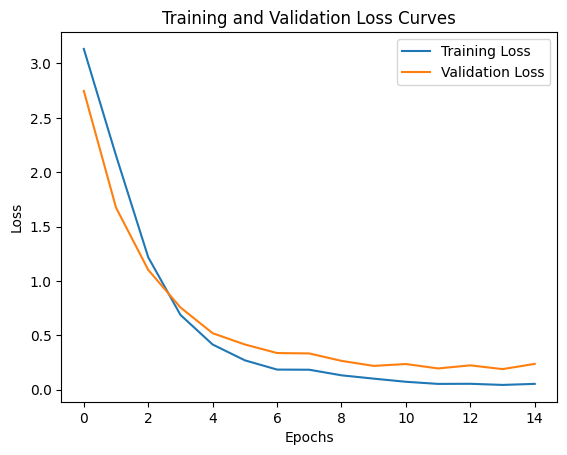

In [17]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Plot both training and validation loss curves
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()